In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [13]:
df_PI = pd.read_csv("Advertising.csv")
df_PII = pd.read_csv("Advertising_PII.csv", parse_dates=['Date'], index_col='Date')

In [3]:
df_PI.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df_PI.shape

(200, 5)

In [6]:
df_PII.shape

(200, 5)

In [14]:
df_PI.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [15]:
df_PII.head(5)

,TV,Radio,Banners,Sales
Date,,,,
2018-01-07,13528.1,0.00,0.00,9779.80
2018-01-14,0.0,5349.65,2218.93,13245.19
2018-01-21,0.0,4235.86,2046.96,12022.66
2018-01-28,0.0,3562.21,0.00,8846.95
2018-02-04,0.0,0.00,2187.29,9797.07


In [6]:
df_mmm = df.copy().drop(['Unnamed: 0'], axis=1)

<AxesSubplot:>

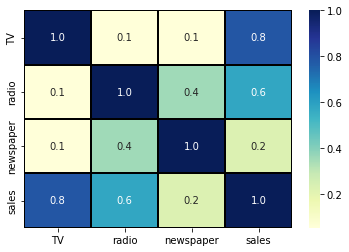

In [6]:
corr = df_mmm.corr()
sns.heatmap(corr,
            fmt='.1f',
            linewidth=0.2,
            linecolor='black',
            annot = True,
            cmap="YlGnBu" 
            )

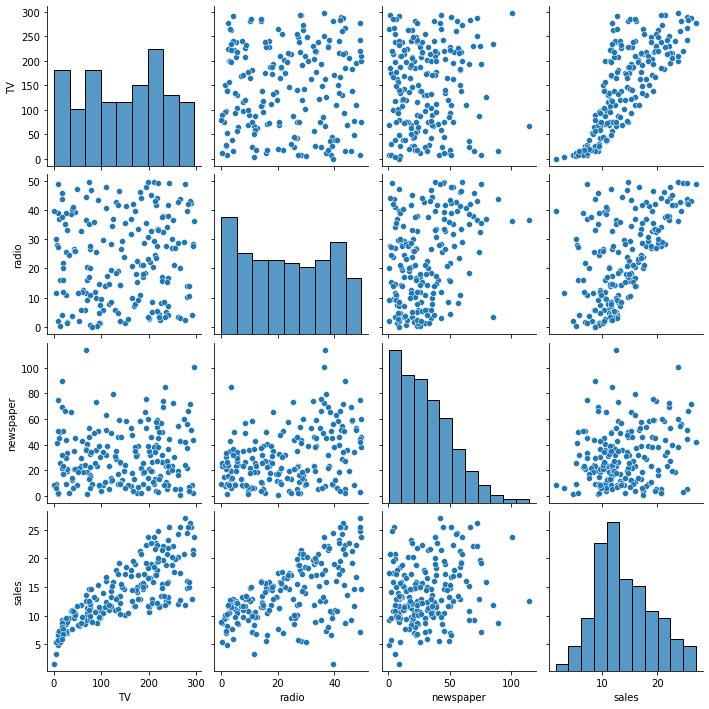

In [7]:
sns.pairplot(df_mmm)

**Marketing Mix Model using simple OLS model**

https://towardsdatascience.com/building-a-simple-marketing-mix-model-with-ols-571ac3d5b64f

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [7]:
X = df_mmm.loc[:, df_mmm.columns != 'sales']
y = df_mmm['sales']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [11]:
X.head(5)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [12]:
y.head(5)

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [13]:
model = RandomForestRegressor(random_state=1)

In [14]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [15]:
y_pred = model.predict(X_test)

In [16]:
rms = mse(y_test, y_pred, squared=False)
rms
#print('rms')

0.993367343936773

**OLS Regression**

In [17]:
import statsmodels.formula.api as sm
modelA = sm.ols(formula="sales~TV+radio+newspaper", data=df_mmm).fit()
modelB = sm.ols(formula="sales~TV+radio+newspaper", data=df_mmm).fit()
print(modelA.summary())
print(modelB.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        19:42:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

<AxesSubplot:>

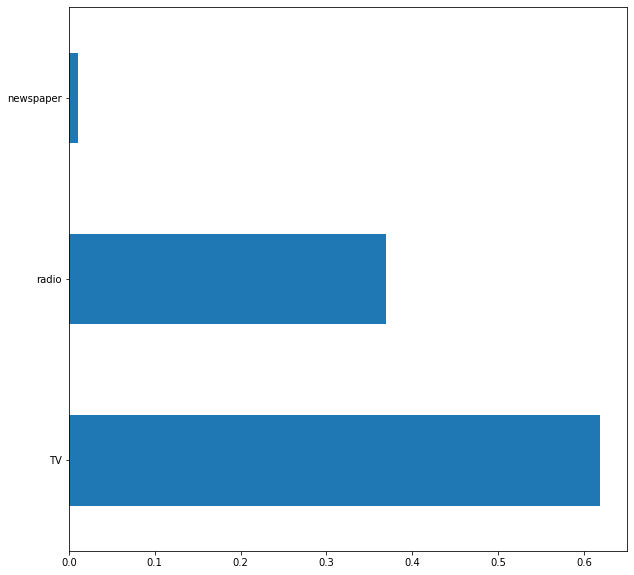

In [18]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [19]:
df_mmm['sales']

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [20]:
y_pred.shape

(50,)

In [35]:
y.shape

(200,)

In [21]:
y_pred_all = model.predict(X)

In [22]:
df_temp = pd.DataFrame({'actual sales': y, 'predicted sales': y_pred_all})
df_temp.head(5)

,actual sales,predicted sales
0,22.1,21.953
1,10.4,10.977
2,9.3,8.674
3,18.5,18.374
4,12.9,14.371


In [23]:
df_temp.shape

(200, 2)

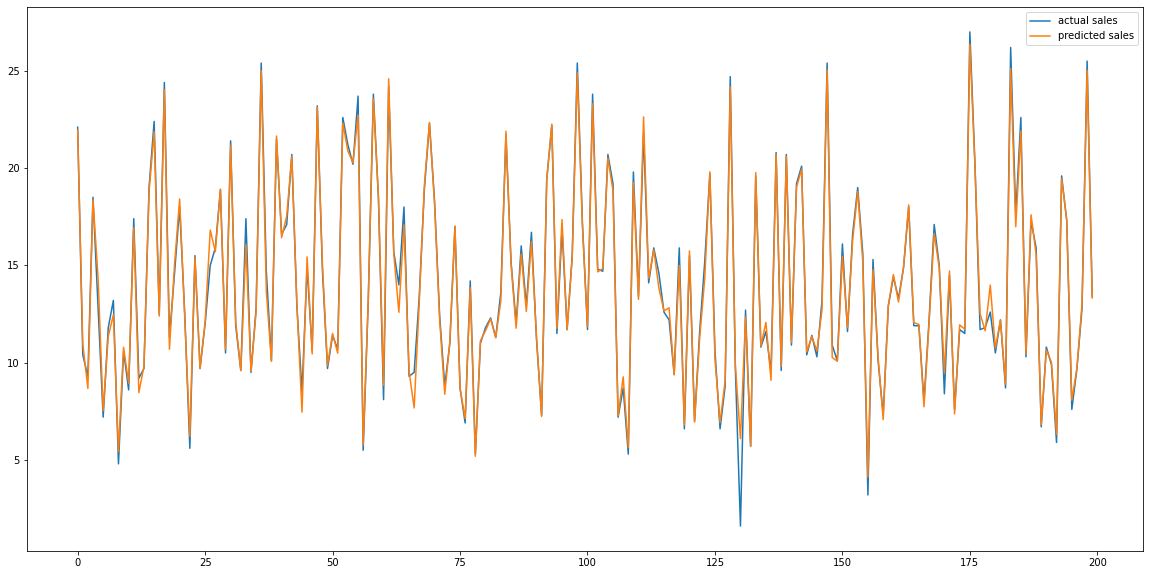

In [24]:
fig, ax = plt.subplots(figsize=(20,10))

df_temp['actual sales'].plot()
df_temp['predicted sales'].plot()
plt.legend()
plt.show()

#ax.set(label = 'actual', label = 'predicted');

Using **AutoML - Pycaret**

In [27]:
from pycaret.regression import *

In [28]:
mmm = setup(df_mmm, target='sales')

,Description,Value
0,session_id,7250
1,Target,sales
2,Original Data,"(200, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(139, 3)"


In [29]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4187,0.2908,0.5264,0.9869,0.0385,0.0330,0.3510
catboost,CatBoost Regressor,0.5218,0.5654,0.7195,0.9754,0.0533,0.0430,0.7160
gbr,Gradient Boosting Regressor,0.5652,0.5407,0.7286,0.9752,0.0505,0.0421,0.0410
rf,Random Forest Regressor,0.5806,0.5437,0.7258,0.9752,0.0548,0.0460,0.3990
xgboost,Extreme Gradient Boosting,0.7088,0.8137,0.8869,0.9626,0.0606,0.0523,4.5020
ada,AdaBoost Regressor,0.9141,1.2947,1.1229,0.9380,0.0840,0.0736,0.0710
lightgbm,Light Gradient Boosting Machine,0.9215,1.5613,1.2053,0.9311,0.1026,0.0807,0.0930
dt,Decision Tree Regressor,0.9932,1.7856,1.2629,0.9123,0.0864,0.0726,0.0110
lasso,Lasso Regression,1.1176,2.2354,1.4705,0.8950,0.1215,0.0983,0.0110
en,Elastic Net,1.1174,2.2379,1.4717,0.8947,0.1226,0.0988,0.0110


In [30]:
print(best)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=7250, verbose=0, warm_start=False)


In [31]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3415,0.2205,0.4696,0.9848,0.0286,0.0233
1,0.5349,0.4407,0.6638,0.9846,0.0381,0.0331
2,0.4916,0.4154,0.6445,0.9736,0.0554,0.0431
3,0.3714,0.2090,0.4572,0.9867,0.0304,0.0277
4,0.2920,0.1515,0.3893,0.9927,0.0341,0.0274
5,0.5020,0.4968,0.7048,0.9867,0.0510,0.0419
6,0.5892,0.4249,0.6519,0.9812,0.0598,0.0556
7,0.3248,0.1668,0.4084,0.9931,0.0274,0.0231
8,0.3596,0.1835,0.4283,0.9941,0.0326,0.0292
9,0.3796,0.1989,0.4460,0.9917,0.0280,0.0262


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


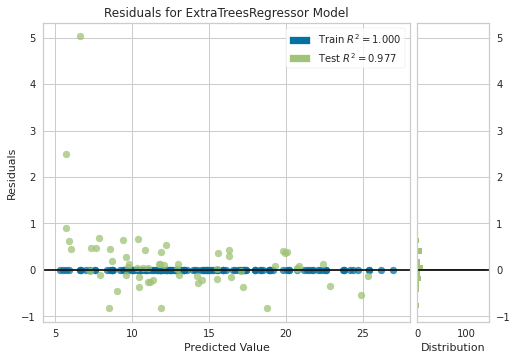

In [32]:
plot_model(et)

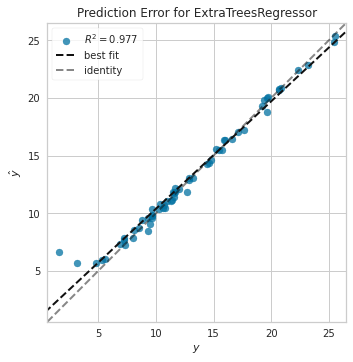

In [33]:
plot_model(et, plot='error')

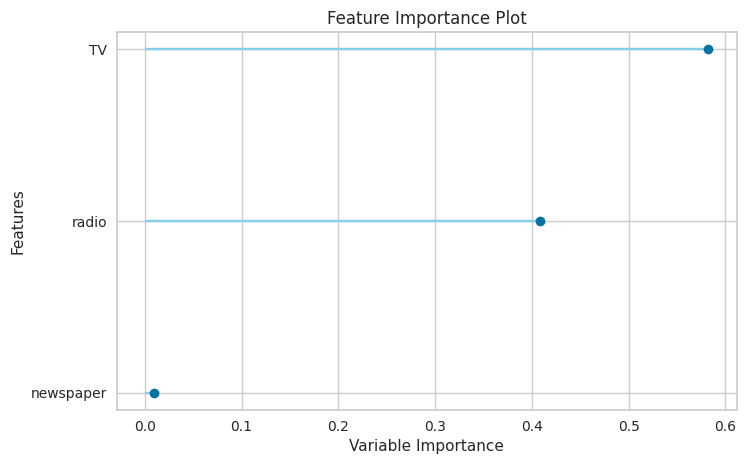

In [34]:
plot_model(et, plot='feature')

In [35]:
pm = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.4104,0.6539,0.8086,0.9772,0.1546,0.0925


In [36]:
pm.head(10)

,TV,radio,newspaper,sales,Label
0,206.899994,8.400000,26.400000,12.9,13.019
1,217.699997,33.500000,59.000000,19.4,19.806
2,197.600006,23.299999,14.200000,16.6,16.447
3,27.500000,1.600000,20.700001,6.9,7.364
4,8.700000,48.900002,75.000000,7.2,7.887
5,97.500000,7.600000,7.200000,9.7,10.375
6,219.800003,33.500000,45.099998,19.6,19.958
7,199.800003,3.100000,34.599998,11.4,11.147
8,4.100000,11.600000,5.700000,3.2,5.694
9,17.900000,37.599998,21.600000,8.0,7.897


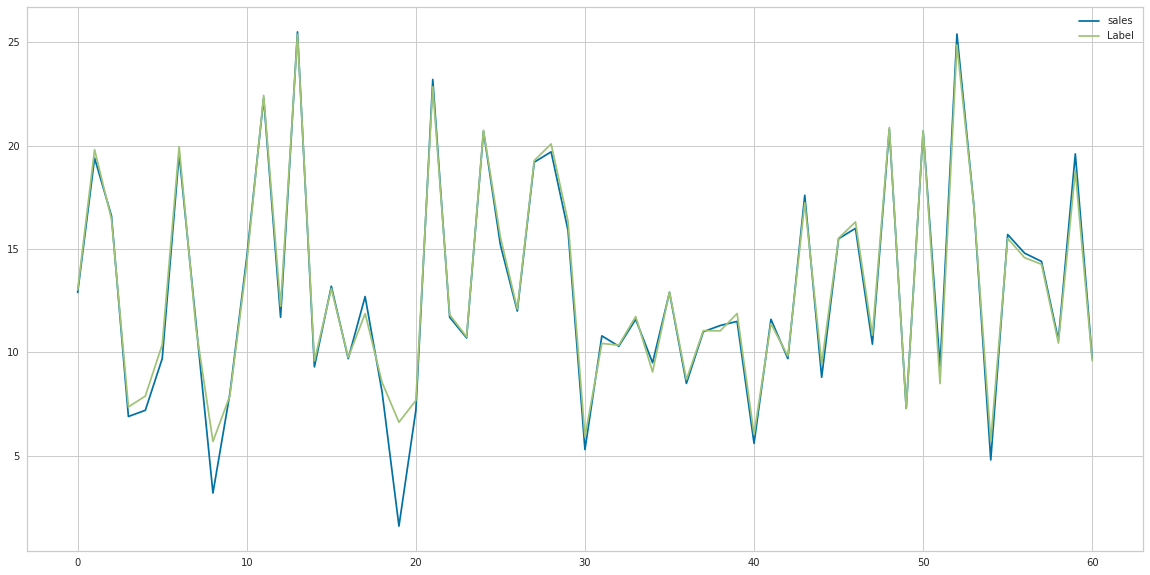

/home/svam/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn(msg, category=FutureWarning)
/home/svam/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn(msg, category=FutureWarning)
/home/svam/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn(msg, category=FutureWarning)
/home/svam/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn(msg, category=FutureWarning)
/home/svam/.local/li

In [37]:
fig, ax = plt.subplots(figsize=(20,10))

pm['sales'].plot()
pm['Label'].plot()
plt.legend()
plt.show()

#ax.set(label = 'actual', label = 'predicted');

------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------

**Modelling via simple Linear Regression** -- **Part I**

https://towardsdatascience.com/introduction-to-marketing-mix-modeling-in-python-d0dd81f4e794

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

In [17]:
X = df_PII.loc[:, df_PII.columns != 'Sales']
y = df_PII['Sales']

In [18]:
X.head(5)

,TV,Radio,Banners
Date,,,
2018-01-07,13528.1,0.00,0.00
2018-01-14,0.0,5349.65,2218.93
2018-01-21,0.0,4235.86,2046.96
2018-01-28,0.0,3562.21,0.00
2018-02-04,0.0,0.00,2187.29


In [19]:
lr = LinearRegression()
print(cross_val_score(lr, X, y, cv=TimeSeriesSplit()))

[0.69594303 0.69302285 0.66850729 0.78807363 0.73512387]


In [20]:
lr.fit(X, y) # refit the model with the complete dataset

print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [0.35968382 0.48833246 1.2159193 ]
Intercept: 6678.396933606161


In [28]:
#slope or coefficient
coef = pd.Series(lr.coef_, index=X.columns)

In [29]:
coef

TV         0.359684
Radio      0.488332
Banners    1.215919
dtype: float64

In [31]:
#constant or intercept
base = lr.intercept_

In [34]:
#coef(TV, Radio, Banners) * spendings(TV, Radio, Banners)
unadj_contributions = X.mul(coef).assign(Base=base)

In [51]:
y

Date
2018-01-07     9779.80
2018-01-14    13245.19
2018-01-21    12022.66
2018-01-28     8846.95
2018-02-04     9797.07
                ...   
2021-10-03     9030.17
2021-10-10    15904.11
2021-10-17    12839.29
2021-10-24     9063.45
2021-10-31     7250.21
Name: Sales, Length: 200, dtype: float64

In [35]:
unadj_contributions

,TV,Radio,Banners,Base
Date,,,,
2018-01-07,4865.838699,0.000000,0.000000,6678.396934
2018-01-14,0.000000,2612.407764,2698.039815,6678.396934
2018-01-21,0.000000,2068.507949,2488.938173,6678.396934
2018-01-28,0.000000,1739.542785,0.000000,6678.396934
2018-02-04,0.000000,0.000000,2659.568129,6678.396934
...,...,...,...,...
2021-10-03,0.000000,0.000000,2056.946364,6678.396934
2021-10-10,4152.038962,2253.825236,3062.754810,6678.396934
2021-10-17,0.000000,2224.920837,2333.580164,6678.396934


In [52]:
#contribution = correction_factor * unadj_contributions
#correction_factor = actual sales / predicted sales

adj_contributions = (unadj_contributions.div(unadj_contributions.sum(axis=1), axis=0).mul(y, axis=0))
adj_contributions

,TV,Radio,Banners,Base
Date,,,,
2018-01-07,4122.137734,0.000000,0.000000,5657.662266
2018-01-14,0.000000,2886.169485,2980.775165,7378.245350
2018-01-21,0.000000,2213.360195,2663.232057,7146.067747
2018-01-28,0.000000,1828.196513,0.000000,7018.753487
2018-02-04,0.000000,0.000000,2790.326902,7006.743098
...,...,...,...,...
2021-10-03,0.000000,0.000000,2126.370391,6903.799609
2021-10-10,4089.578199,2219.920052,3016.680579,6577.931169
2021-10-17,0.000000,2542.196612,2666.350859,7630.742529


In [43]:
unadj_contributions.sum(axis=1)

Date
2018-01-07    11544.235632
2018-01-14    11988.844513
2018-01-21    11235.843056
2018-01-28     8417.939719
2018-02-04     9337.965062
                  ...     
2021-10-03     8735.343297
2021-10-10    16147.015942
2021-10-17    11236.897935
2021-10-24     8754.761529
2021-10-31     8944.031527
Length: 200, dtype: float64

In [47]:
unadj_contributions.div(unadj_contributions.sum(axis=1), axis=0).mul(y, axis=0))

SyntaxError: invalid syntax (3697801219.py, line 1)

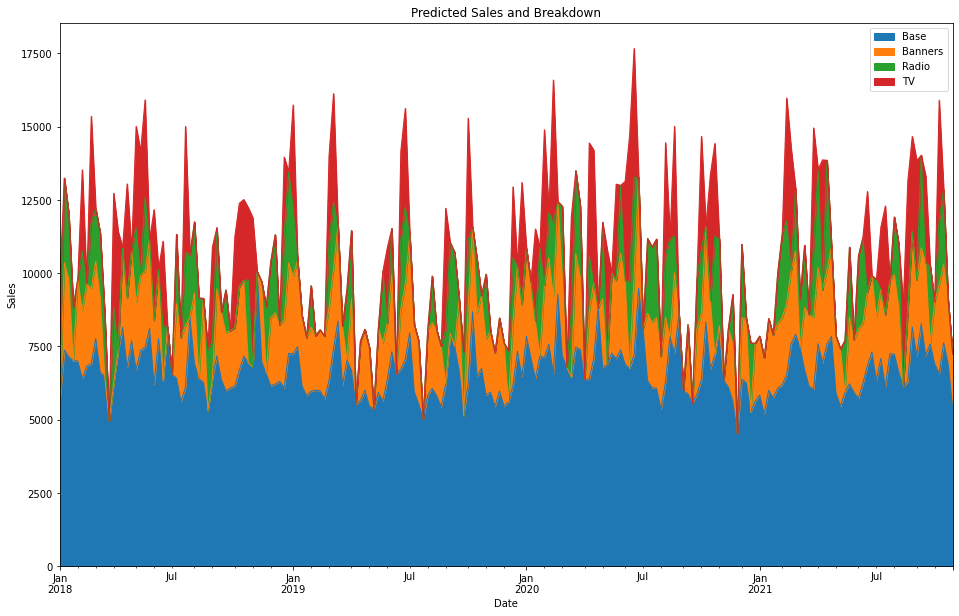

In [100]:
ax = (adj_contributions[['Base', 'Banners', 'Radio', 'TV']]
      .plot.area(
          figsize=(16, 10),
          linewidth=1,
          title='Predicted Sales and Breakdown',
          ylabel='Sales',
          xlabel='Date')
     )

In [102]:
y_pred = lr.predict(X)

In [104]:
df_temp = pd.DataFrame({'actual sales': y, 'predicted sales': y_pred})
df_temp.head(5)

,actual sales,predicted sales
Date,,
2018-01-07,9779.80,11544.235632
2018-01-14,13245.19,11988.844513
2018-01-21,12022.66,11235.843056
2018-01-28,8846.95,8417.939719
2018-02-04,9797.07,9337.965062


In [106]:
X.head(5)

,TV,Radio,Banners
Date,,,
2018-01-07,13528.1,0.00,0.00
2018-01-14,0.0,5349.65,2218.93
2018-01-21,0.0,4235.86,2046.96
2018-01-28,0.0,3562.21,0.00
2018-02-04,0.0,0.00,2187.29


In [107]:
print(lr.predict(([[0.0, 4235.86, 2046.96]])))

[11235.84305597]


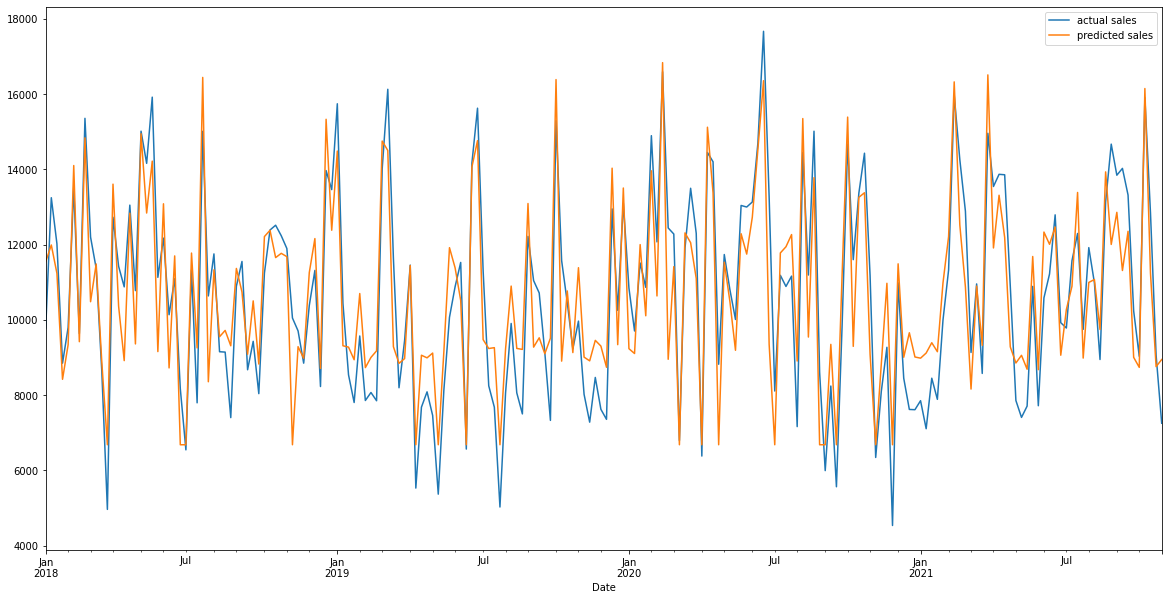

In [108]:
fig, ax = plt.subplots(figsize=(20,10))

df_temp['actual sales'].plot()
df_temp['predicted sales'].plot()
plt.legend()
plt.show()

#ax.set(label = 'actual', label = 'predicted');

Calculating Sales from individual channels and Calculating ROI

In [59]:
sales_from_tv = adj_contributions['TV'].sum()
sales_from_radio = adj_contributions['Radio'].sum()
sales_from_banners = adj_contributions['Banners'].sum()

spendings_on_tv = df_PII['TV'].sum()
spendings_on_radio = df_PII['Radio'].sum()
spendings_on_banners = df_PII['Banners'].sum()

**channel_ROI = Sales from the channel / channel spendings**

In [60]:
tv_roi = sales_from_tv / spendings_on_tv
radio_roi = sales_from_radio / spendings_on_radio
banners_roi = sales_from_banners / spendings_on_banners

In [61]:
tv_roi

0.3602450071355313

In [62]:
sales_from_tv

212271.31917940138

In [83]:
sales = pd.DataFrame([[sales_from_tv, sales_from_radio, sales_from_banners]], columns=['sales_from_tv', 'sales_from_radio', 'sales_from_banners'])

In [86]:
sales_t = sales.T

In [88]:
sales

,sales_from_tv,sales_from_radio,sales_from_banners
0,212271.319179,216708.158463,369452.999433


<AxesSubplot:>

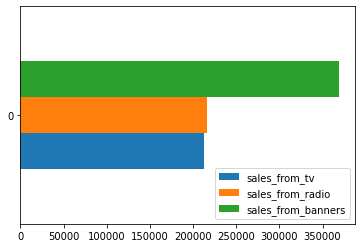

In [95]:
#sales contribution from individual channels
sales.plot(kind='barh')

In [96]:
roi = pd.DataFrame([[tv_roi, radio_roi, banners_roi]], columns=['tv_roi', 'radio_roi', 'banners_roi'])

In [97]:
roi

,tv_roi,radio_roi,banners_roi
0,0.360245,0.489496,1.214728


<AxesSubplot:>

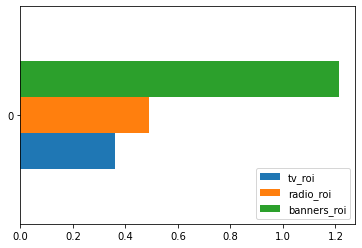

In [98]:
#roi from individual channels
roi.plot(kind='barh')

In [99]:
df_PII

,TV,Radio,Banners,Sales
Date,,,,
2018-01-07,13528.10,0.00,0.00,9779.80
2018-01-14,0.00,5349.65,2218.93,13245.19
2018-01-21,0.00,4235.86,2046.96,12022.66
2018-01-28,0.00,3562.21,0.00,8846.95
2018-02-04,0.00,0.00,2187.29,9797.07
...,...,...,...,...
2021-10-03,0.00,0.00,1691.68,9030.17
2021-10-10,11543.58,4615.35,2518.88,15904.11
2021-10-17,0.00,4556.16,1919.19,12839.29


**Part II** - https://towardsdatascience.com/an-upgraded-marketing-mix-modeling-in-python-5ebb3bddc1b6